In [1]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.misc
import scipy.linalg
%matplotlib inline

In [2]:
# read image
img0 = imageio.imread('foto.jpg')
img1 = imageio.imread('foto.jpg', pilmode = 'I')
n, d = img1.shape

(4000, 6000, 3)


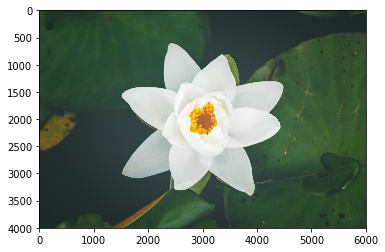

In [3]:
# original image
plt.imshow(img0)
print (img0.shape)

(4000, 6000)


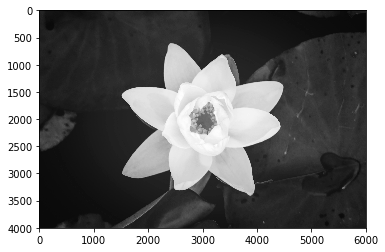

In [4]:
# gray scale image
plt.imshow(img1, cmap = 'gist_gray')
print (img1.shape)

In [5]:
# SVD decompostion
U, s, Vh = scipy.linalg.svd(img1, full_matrices = False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


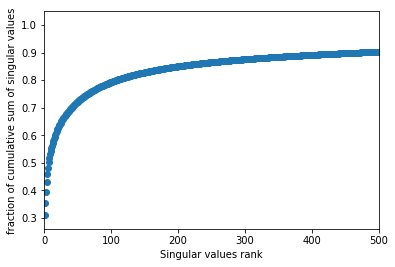

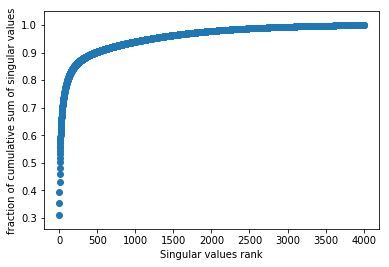

In [6]:
# right number of dimensions
fig = plt.figure()
plt.scatter(range(1, len(s) + 1), np.cumsum(s) / sum(s))
plt.xlabel('Singular values rank')
plt.ylabel('fraction of cumulative sum of singular values')
plt.xlim((0, 500))
fig.show()

fig = plt.figure()
plt.scatter(range(1, len(s) + 1), np.cumsum(s) / sum(s))
plt.xlabel('Singular values rank')
plt.ylabel('fraction of cumulative sum of singular values')
fig.show()

# computing variance from singular values (squared and divide by n)
#fig = plt.figure()
#eigenvalues = map(lambda w: w * w / float(n), s)
#plt.scatter(range(1, len(s) + 1), np.cumsum(eigenvalues) / sum(eigenvalues))
#plt.xlabel('Singular values rank')
#plt.ylabel('Fraction of variance')
#plt.xlim((0, 200))
#fig.show()


In [10]:
# reconstructing image in lower rank
k = 100
Dk = np.diag(s[:k])
Uk = U[:, :k] 
Vhk = Vh[:k, :]
imgk = np.matmul(Uk, np.matmul(Dk, Vhk))
print (Uk.shape, U.shape)
print (Dk.shape, s.shape)
print (Vhk.shape, Vh.shape)
L, C = img1.shape
original = L * C
compressed = L * k + k + k * C
print (compressed / float(original))

(4000, 100) (4000, 4000)
(100, 100) (4000,)
(100, 6000) (4000, 6000)
0.04167083333333333


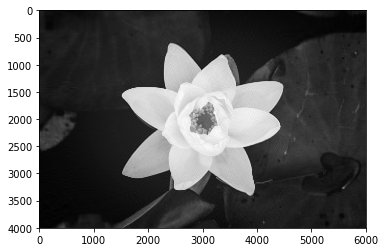

In [11]:
plt.imshow(imgk, cmap = 'gist_gray')